In [1]:
import warnings
warnings.filterwarnings('ignore')

의사결정 트리(Decision tree)  
데이터 분류 및 회귀에 사용되는 지도 학습 알고리즘으로 가장 큰 장점은 결과값이 어떻게 나왔는지 이해하기가 가장 쉽다는 것이다. 또한 높은 정확도 역시 상당히 큰 장점 중 하나이다. 하지만 과대 적합되기 쉬운 알고리즘이라는 단점도 있다.
***
의사결정 트리 알고리즘은 스므고개와 상당히 비슷하다. 데이터의 특징을 바탕으로 데이터를 연속적으로 분리하다 보면 결국 하나의 정답으로 데이터를 분류할 수 있는데 스므고개에서 적은 질문으로 정답을 맞추기 위해서는 의미 있는 질문을 먼저 하는 것이 중요하듯이 의사결정 트리에서도 의미 있는 질문을 먼저 하는 것이 상당히 중요하다. 데이터의 특징 속에서 분류에 큰 영향을 끼치는 특징을 발견하고 상위 노드로 선택하는 알고리즘이 의사결정 트리 알고리즘의 핵심이다.
***
스므고개를 할 때 질문자는 질문을 하나 던질 때마다 약간씩의 정보를 획득한다. 약간씩의 정보를 획득하는 과정은 정답에 대한 불확실성이 조금씩 줄어든다는 것과 같은 개념이다. 정보 이론(Information Theory)에서는 이 불확실성을 수치적으로 표현한 값을 엔트로피(Entropy)라고 표현하며 정보 이득(Information gain)은 질문 이전의 엔트로피에서 질문 후의 엔트로피를 뺀 값이된다. 즉 불확실성이 줄어든 정도를 정보 이득이라고 한다.
***
지니 계수(Gini Index)  
P^2 + Q^2 으로 계산하며 불순도를 측정하는 지표로 데이터의 통계적 분산정도를 정량화해서 표현한 것을 의미한다.  
사이킷런의 의사결정 트리는 CART(Classification And Regression Tree) 타입의 의사결정 트리이며 CART는 트리의 노드마다 특징을 이진 분류하는 특징이 있기에 사이킷런은 트리를 구성할 때 지니 계수를 사용한다.

문제 정의  
서울 지역(구)의 경도와 위도 정보를 학습해서 임의로 입력된 지역(동)을 강동, 강서, 강남으로 분류하는 모델을 구현한다.  
즉, 특정 지역이 강동구인지 강서구인지 아니면 강남구나 강북구인지 알아내는 모델을 구현하려 한다.

데이터 획득  
district : 구, dong : 동, latitude : 위도, longitude : 경도, label : 강동, 강서, 강남, 강북으로 구분한 지역

In [2]:
# 구 데이터 => 학습 데이터
district_dict_list = [
        {'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},
        {'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangseo'},
        {'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},
        {'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangseo'},
        {'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},

        {'district': 'Gwanak-gu', 'latitude': 37.487517, 'longitude': 126.915065, 'label':'Gangnam'},
        {'district': 'Dongjak-gu', 'latitude': 37.5124, 'longitude': 126.9393, 'label':'Gangnam'},
        {'district': 'Seocho-gu', 'latitude': 37.4837, 'longitude': 127.0324, 'label':'Gangnam'},
        {'district': 'Gangnam-gu', 'latitude': 37.5172, 'longitude': 127.0473, 'label':'Gangnam'},
        {'district': 'Songpa-gu', 'latitude': 37.503510, 'longitude': 127.117898, 'label':'Gangnam'},

        {'district': 'Yongsan-gu', 'latitude': 37.532561, 'longitude': 127.008605, 'label':'Gangbuk'},
        {'district': 'Jongro-gu', 'latitude': 37.5730, 'longitude': 126.9794, 'label':'Gangbuk'},
        {'district': 'Seongbuk-gu', 'latitude': 37.603979, 'longitude': 127.056344, 'label':'Gangbuk'},
        {'district': 'Nowon-gu', 'latitude': 37.6542, 'longitude': 127.0568, 'label':'Gangbuk'},
        {'district': 'Dobong-gu', 'latitude': 37.6688, 'longitude': 127.0471, 'label':'Gangbuk'},

        {'district': 'Seongdong-gu', 'latitude': 37.557340, 'longitude': 127.041667, 'label':'Gangdong'},
        {'district': 'Dongdaemun-gu', 'latitude': 37.575759, 'longitude': 127.025288, 'label':'Gangdong'},
        {'district': 'Gwangjin-gu', 'latitude': 37.557562, 'longitude': 127.083467, 'label':'Gangdong'},
        {'district': 'Gangdong-gu', 'latitude': 37.554194, 'longitude': 127.151405, 'label':'Gangdong'},
        {'district': 'Jungrang-gu', 'latitude': 37.593684, 'longitude': 127.090384, 'label':'Gangdong'}
    ]

# 동 데이터 => 테스트 데이터
dong_dict_list = [
        {'dong': 'Gaebong-dong', 'latitude': 37.489853, 'longitude': 126.854547, 'label':'Gangseo'},
        {'dong': 'Gochuk-dong', 'latitude': 37.501394, 'longitude': 126.859245, 'label':'Gangseo'},
        {'dong': 'Hwagok-dong', 'latitude': 37.537759, 'longitude': 126.847951, 'label':'Gangseo'},
        {'dong': 'Banghwa-dong', 'latitude': 37.575817, 'longitude': 126.815719, 'label':'Gangseo'},
        {'dong': 'Sangam-dong', 'latitude': 37.577039, 'longitude': 126.891620, 'label':'Gangseo'},

        {'dong': 'Nonhyun-dong', 'latitude': 37.508838, 'longitude': 127.030720, 'label':'Gangnam'},
        {'dong': 'Daechi-dong', 'latitude': 37.501163, 'longitude': 127.057193, 'label':'Gangnam'},
        {'dong': 'Seocho-dong', 'latitude': 37.486401, 'longitude': 127.018281, 'label':'Gangnam'},
        {'dong': 'Bangbae-dong', 'latitude': 37.483279, 'longitude': 126.988194, 'label':'Gangnam'},
        {'dong': 'Dogok-dong', 'latitude': 37.492896, 'longitude': 127.043159, 'label':'Gangnam'},

        {'dong': 'Pyoungchang-dong', 'latitude': 37.612129, 'longitude': 126.975724, 'label':'Gangbuk'},
        {'dong': 'Sungbuk-dong', 'latitude': 37.597916, 'longitude': 126.998067, 'label':'Gangbuk'},
        {'dong': 'Ssangmoon-dong', 'latitude': 37.648094, 'longitude': 127.030421, 'label':'Gangbuk'},
        {'dong': 'Ui-dong', 'latitude': 37.648446, 'longitude': 127.011396, 'label':'Gangbuk'},
        {'dong': 'Samcheong-dong', 'latitude': 37.591109, 'longitude': 126.980488, 'label':'Gangbuk'},

        {'dong': 'Hwayang-dong', 'latitude': 37.544234, 'longitude': 127.071648, 'label':'Gangdong'},
        {'dong': 'Gui-dong', 'latitude': 37.543757, 'longitude': 127.086803, 'label':'Gangdong'},
        {'dong': 'Neung-dong', 'latitude': 37.553102, 'longitude': 127.080248, 'label':'Gangdong'},
        {'dong': 'Amsa-dong', 'latitude': 37.552370, 'longitude': 127.127124, 'label':'Gangdong'},
        {'dong': 'Chunho-dong', 'latitude': 37.547436, 'longitude': 127.137382, 'label':'Gangdong'}
    ]

In [3]:
import pandas as pd
train_df = pd.DataFrame(district_dict_list)
train_df.head()

,district,latitude,longitude,label
0,Gangseo-gu,37.551000,126.849500,Gangseo
1,Yangcheon-gu,37.524240,126.855396,Gangseo
2,Guro-gu,37.495400,126.887400,Gangseo
3,Geumcheon-gu,37.451900,126.902000,Gangseo
4,Mapo-gu,37.560229,126.908728,Gangseo


In [4]:
test_df = pd.DataFrame(dong_dict_list)
test_df.head()

,dong,latitude,longitude,label
0,Gaebong-dong,37.489853,126.854547,Gangseo
1,Gochuk-dong,37.501394,126.859245,Gangseo
2,Hwagok-dong,37.537759,126.847951,Gangseo
3,Banghwa-dong,37.575817,126.815719,Gangseo
4,Sangam-dong,37.577039,126.891620,Gangseo


학습 데이터와 테스트 데이터의 레이블 분포를 확인한다.

In [5]:
print('train_df.label')
print(train_df.label.value_counts())
print('test_df.label')
print(test_df.label.value_counts())
# 학습 데이터의 레이블은 강남, 강북, 강서, 강동으로 총 4개 값으로 5개씩 일정한 양으로 분포되어 있음을 확인할 수 있다.

train_df.label
Gangseo     5
Gangbuk     5
Gangdong    5
Gangnam     5
Name: label, dtype: int64
test_df.label
Gangseo     5
Gangbuk     5
Gangdong    5
Gangnam     5
Name: label, dtype: int64


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

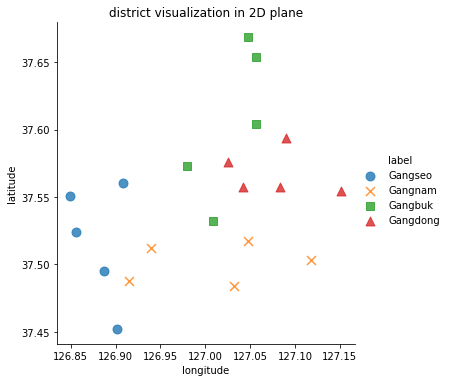

In [7]:
sns.lmplot(x='longitude', y='latitude', data=train_df, fit_reg=False, markers=['o', 'x', 's', '^'], hue='label',
           scatter_kws={'s': 80})
plt.title('district visualization in 2D plane')
plt.show()

데이터 다듬기  
위의 시각화를 통해 구 이름과 동 이름이 학습이나 테스트에 별 영향을 미치지 않는다는 점을 알았으므로 학습 및 테스트에 필요없는 특징을 데이터에서 제거한다.

In [8]:
# train_df = train_df.drop(['district'], axis=1)
train_df.drop(['district'], axis=1, inplace=True) # 학습 데이터에서 구 제거
test_df.drop(['dong'], axis=1, inplace=True)      # 테스트 데이터에서 동 제거

In [9]:
X_train = train_df[['latitude', 'longitude']]
Y_train = train_df[['label']]
X_test = test_df[['latitude', 'longitude']]
Y_test = test_df[['label']]

모델 학습  
사이킷런의 의사결정 트리를 로드해서 학습한다.

In [10]:
import numpy as np
from sklearn import tree
from sklearn import preprocessing

In [16]:
# sklearn.preprocessing에 포함된 LabelEncoder는 데이터를 모델화 시키고 학습을 시키기 위해서 숫자로 만든다.
# Spain, Germany, France가 있는 경우 Spain은 0, Germany는 1, France는 2라고 정의하려 할 경우 사용한다.
le = preprocessing.LabelEncoder()
y_encoded = le.fit_transform(Y_train)
print(y_encoded)

# DecisionTreeClassifier() 메소드로 의사결정 트리를 학습시킨다.
# DecisionTree의 내부 알고리즘이 구동시 random하게 특성들과 데이터 건수를 선탤하는 로직이 포함되어 있기 때문에 random_state로
# 특정값을 지정하여 DecisionTree 수행시 마다 동일한 Rule의 트리를 만들 수 있도록 한다.
clf = tree.DecisionTreeClassifier(random_state=35).fit(X_train, y_encoded)

[3 3 3 3 3 2 2 2 2 2 0 0 0 0 0 1 1 1 1 1]


학습된 의사결정 트리를 시각화하는 함수

In [21]:
print(np.array([1, 2, 3]))
print(np.array([4, 5, 6]))
print(np.c_[np.array([1, 2, 3]), np.array([4, 5, 6])])

[1 2 3]
[4 5 6]
[[1 4]
 [2 5]
 [3 6]]


In [22]:
def display_decision_surface(clf, x, y):
    x_min = x.longitude.min() - 0.01
    x_max = x.longitude.max() + 0.01
    y_min = x.latitude.min() - 0.01
    y_max = x.latitude.max() + 0.01
    
    # classes_ : LabelEncoder()를 실행했을 때 숫자로 대체된 문자열 그룹의 개수
    n_classes = len(le.classes_)
    # print('le.classes_ :', n_classes)
    plot_color = 'rywb'
    plot_step = 0.001
    
    # meshgrid() : 좌표 벡터로 부터 좌표 행렬을 반환한다.
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
    
    # np.c_[a, b] => 두 개의 1차원 배열을 컬럼으로 세로로 붙여서 2차원 배열을 만든다.

In [18]:
display_decision_surface(clf, X_train, y_encoded)